In [1]:
import pandas as pd
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

In [2]:
crime = pd.read_csv('data/crime.csv', low_memory=False)
pop = pd.read_csv('data/total-population.csv', low_memory=False)
neighborhoods = geopandas.read_file("data/Neighborhoods/Neighborhoods_.shp")


Importing and loading necessary packages and files.

In [3]:
len(crime)

276271

Showing the representation of the total number of crimes committed in Pittsburgh

In [4]:
crime['INCIDENTNEIGHBORHOOD'].value_counts().sort_values(ascending=True)

Mt. Oliver Boro                40
Ridgemont                      69
Outside County                 83
St. Clair                      89
East Carnegie                 109
                             ... 
Brookline                    2614
East Liberty                 2752
Carrick                      3636
South Side Flats             4904
Central Business District    6808
Name: INCIDENTNEIGHBORHOOD, Length: 94, dtype: int64

Showing the representation of the total number of crimes per neighborhood sorted ascending

In [5]:
crime.groupby(['INCIDENTNEIGHBORHOOD'])['HIERARCHY'].sum().sort_values(ascending=True)

INCIDENTNEIGHBORHOOD
Mt. Oliver Boro                1766.0
Ridgemont                      3843.0
St. Clair                      4547.0
New Homestead                  4555.0
Regent Square                  4983.0
                               ...   
Mount Washington             117671.0
Brookline                    123946.0
Carrick                      154705.0
South Side Flats             209068.0
Central Business District    294090.0
Name: HIERARCHY, Length: 94, dtype: float64

Show the hierarchy of the crimes, which is the code assigned to each crime. 99 is NA and 1 is murder. 

In [6]:
crime["HIERARCHY"] = crime["HIERARCHY"].apply(lambda x: abs(100-x))

We're gonna need to swap these numbers so that murder is 99 and NA is 1.

In [7]:
crime.groupby(['INCIDENTNEIGHBORHOOD'])['HIERARCHY'].sum().sort_values(ascending=True)

INCIDENTNEIGHBORHOOD
Mt. Oliver Boro                2234.0
Outside County                 2385.0
Ridgemont                      3057.0
Outside State                  3346.0
St. Clair                      4353.0
                               ...   
Shadyside                    141037.0
East Liberty                 167624.0
Carrick                      208895.0
South Side Flats             281332.0
Central Business District    386710.0
Name: HIERARCHY, Length: 94, dtype: float64

This is the fixed values that properly reflect severity of time.

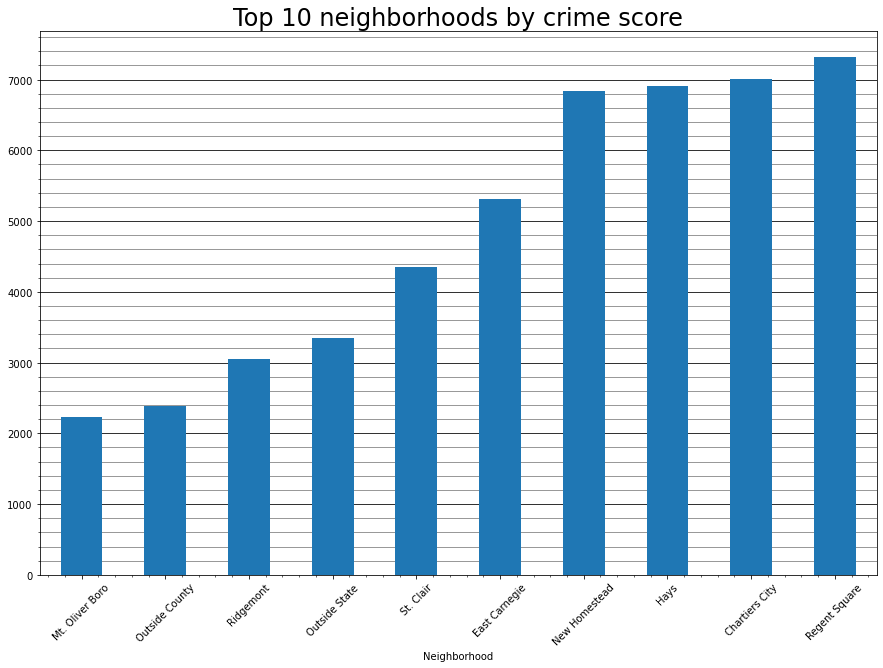

In [8]:
ax1 = crime.groupby(['INCIDENTNEIGHBORHOOD'])['HIERARCHY'].sum().nsmallest(10).sort_values(ascending=True).plot(kind="bar", figsize=(15,10))
ax1.set_xlabel("Neighborhood")
ax1.set_axisbelow(True)
ax1.yaxis.grid(True, color ="black")
ax1.yaxis.grid(True, 'minor', color ="grey")
plt.minorticks_on()
plt.title('Top 10 neighborhoods by crime score', fontdict = {'fontsize': 24})
plt.xticks(rotation=45)
plt.show()

Here is a graph of the top 10 neighborhoods by the crime score we calculated earlier. The reasoning is that murder is a severe crime and should be counted as more crime than NA which is pretty much when no crime occurs and should not really affect crime levels in a certain neighborhood.

In [9]:
crime_map = neighborhoods.merge(crime.groupby(['INCIDENTNEIGHBORHOOD'])['HIERARCHY'].sum(), how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')

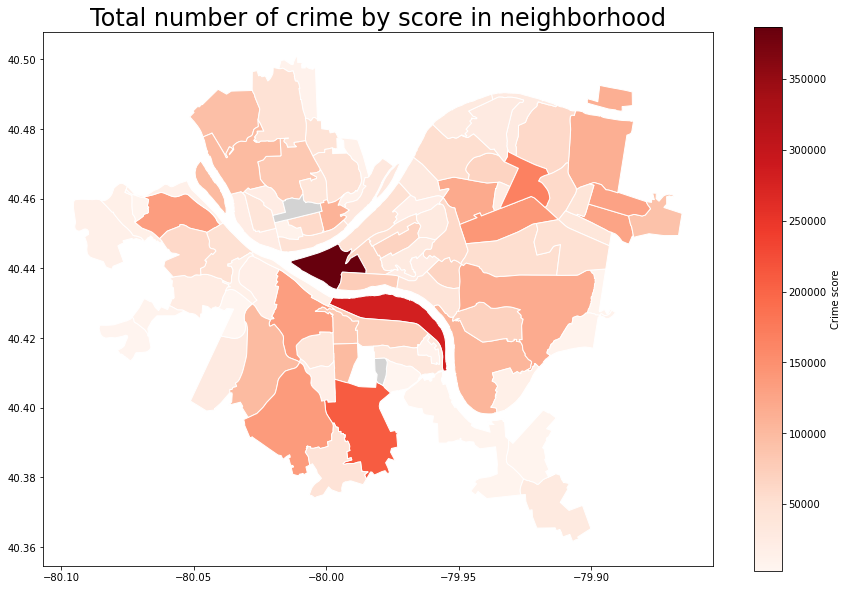

In [10]:
fig2, ax2 = plt.subplots(figsize=(15, 10))
crime_map.plot(column='HIERARCHY',
                cmap='Reds',
                edgecolor="white",
                legend=True, 
                legend_kwds={'label': "Crime score"},
                figsize=(15, 10),
                missing_kwds={"color": "lightgrey"},
                ax=ax2
               )
plt.title('Total number of crime by score in neighborhood', fontdict = {'fontsize': 24})
plt.show()


Here is a map of the places per total crime

In [11]:
pop.groupby(['Neighborhood'])['Estimate; Total'].sum().sort_values(ascending=False)


Neighborhood
Squirrel Hill South    16042.0
Shadyside              13562.0
Brookline              13160.0
Squirrel Hill North    11336.0
Carrick                10122.0
                        ...   
St. Clair                270.0
West End                 235.0
North Shore              205.0
South Shore               12.0
Chateau                    3.0
Name: Estimate; Total, Length: 91, dtype: float64

Get the population of the people so that we can get crime score per capita instead of total crime score

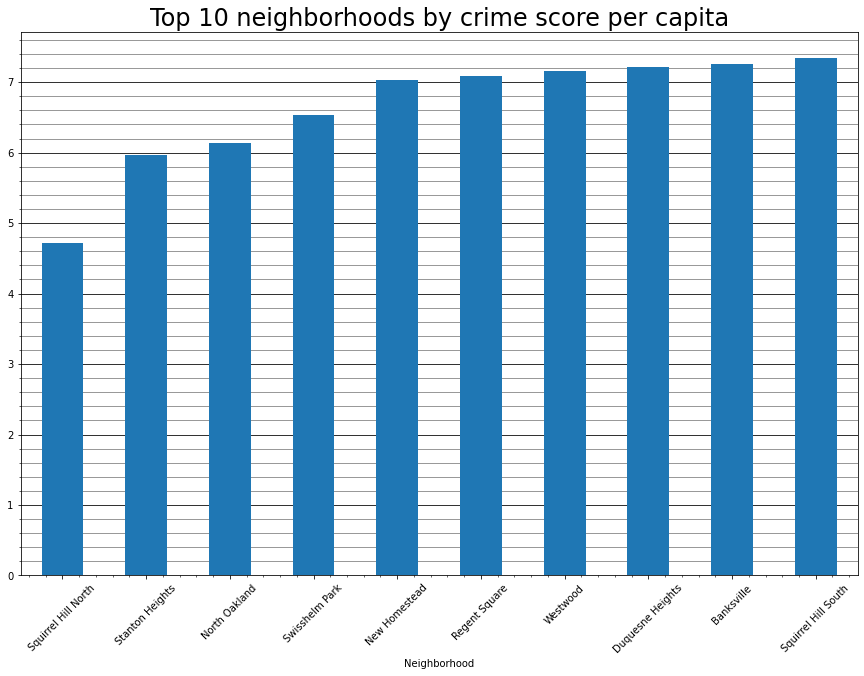

In [12]:

# divide the crime by the population per neighborhood
crime_per_capita = crime.groupby(['INCIDENTNEIGHBORHOOD'])['HIERARCHY'].sum().div(pop.groupby(['Neighborhood'])['Estimate; Total'].sum())
crime_per_capita.rename('Neighborhoods')

ax3 = crime_per_capita.nsmallest(10).plot(kind="bar", figsize=(15,10))
ax3.set_xlabel("Neighborhood")
ax3.set_axisbelow(True)
ax3.yaxis.grid(True, color ="black")
ax3.yaxis.grid(True, 'minor', color ="grey")
plt.minorticks_on()
plt.title('Top 10 neighborhoods by crime score per capita', fontdict = {'fontsize': 24})
plt.xticks(rotation=45)
plt.show()

Conclusion: The best neighborhood is Squirrel Hill North because it has the least crime per capita.